<a href="https://colab.research.google.com/github/Tanulshn/Zero-to-One-Valuation/blob/main/Valuation_0_1_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective 
To derive an alternative notation for the valuation (either PE or PB) of individual stocks to be compared with one another.



# Package Imported

For pandas, numpy and visualisation
- import pandas as pd
- import numpy as np
- import seaborn as sns
- import matplotlib.pyplot as plt
- import pylab
- %matplotlib inline
- plt.style.use('seaborn-darkgrid')

For Standardisation
- from sklearn.preprocessing import StandardScaler


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# For q-q plot
import scipy.stats
import pylab

plt.style.use('seaborn-darkgrid')


import warnings
warnings.simplefilter(action='ignore')

In [2]:
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Zero to One Valuation/HDFC Bank.csv')
raw_data.head()

,Date,Value,Mcap
0,01-04-2002,3.37,6547.59
1,02-04-2002,3.39,6581.35
2,03-04-2002,3.31,6428
3,04-04-2002,3.25,6318.27
4,05-04-2002,3.26,6328.12


### Data PreProcessing 

In [3]:
# Check for info()
df = raw_data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7003 non-null   object
 1   Value   7003 non-null   object
 2   Mcap    7003 non-null   object
dtypes: object(3)
memory usage: 164.3+ KB


In [4]:
# Change datatype to float and create another df with changed datatypes
for i in ['Value','Mcap']:
  df[i]= pd.to_numeric(raw_data[i], errors= 'coerce')

print(raw_data.info(), '\n\n', df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7003 non-null   object
 1   Value   7003 non-null   object
 2   Mcap    7003 non-null   object
dtypes: object(3)
memory usage: 164.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7003 non-null   object 
 1   Value   4768 non-null   float64
 2   Mcap    4768 non-null   float64
dtypes: float64(2), object(1)
memory usage: 164.3+ KB
None 

 None


In [5]:
# Set the Datetime() format for the Date column
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.head()

,Value,Mcap
Date,,
2002-04-01,3.37,6547.59
2002-04-02,3.39,6581.35
2002-04-03,3.31,6428.00
2002-04-04,3.25,6318.27
2002-04-05,3.26,6328.12


In [6]:
# Create seperate dfs for frequncy based on 'm' and 'b'
df_m = df.resample('m').last()
df_b = df.resample('b').last()

In [7]:
for i in ['Value','Mcap']:
  df_b[i] = df_b[i].fillna(method='ffill')
  df_m[i] = df_m[i].fillna(method='ffill')

# Check for no of null
print(df_m.isnull().sum(), '\n',df_b.isnull().sum())
print('\n')
# Check the size of the 2 new dfs
print('No of months: ',len(df_m), 'and No of business days: ',len(df_b))

Value    0
Mcap     0
dtype: int64 
 Value    0
Mcap     0
dtype: int64


No of months:  231 and No of business days:  5003


In [8]:
# Check for null values


The dataframes are ready to be used for further procesing
# Variable transformation

###As of today

In [9]:
  # Import packages
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [10]:
# Create a function for transformation
def scale(series, monthly=False):
  """ Returns a Standardised series based on the Standard scale
  Monthly - Whether to perform on monthly data or daily data
  """

  if monthly:
    if len(series)>84:
      print('No of months available is {}. Hence, the scale function can be applied.'.format(len(series)))
      sc.fit_transform(series[-84:])
      scaled_values = sc.transform(series)
    else:
      print('No of months available is {}. The scale function can not be applied.'.format(len(series)))

    series_fit = sc.fit_transform(series)[-84:] # no of months in 7 years
    scaled_values = sc.transform(series)
 
  else:
    if len(series)>1750:
        print('No of days available is {}. Hence, the scale function can be applied.'.format(len(series)))
        sc.fit_transform(series[-84:])
        scaled_values = sc.transform(series)
    else:
      print('No of days available is {}. The scale function can not be applied.'.format(len(series)))

    series_fit = sc.fit_transform(series)[-1750:] # no of days in 7 years
    scaled_values = sc.transform(series)
  
  return scaled_values


In [11]:
df_m['S_value'] = scale(df_m[['Value']],monthly = True).round(3)
df_m.tail()

No of months available is 231. Hence, the scale function can be applied.


,Value,Mcap,S_value
Date,,,
2021-02-28,4.33,845552.53,0.121
2021-03-31,4.04,823360.73,-0.212
2021-04-30,3.82,778850.97,-0.464
2021-05-31,4.11,836756.26,-0.131
2021-06-30,4.07,829969.07,-0.177


In [12]:
df_b['S_value'] = scale(df_b[['Value']]).round(3)
df_b.tail()

No of days available is 5003. Hence, the scale function can be applied.


,Value,Mcap,S_value
Date,,,
2021-05-27,4.01,816339.50,-0.260
2021-05-28,4.07,828341.24,-0.189
2021-05-31,4.11,836756.26,-0.142
2021-06-01,4.09,834024.83,-0.165
2021-06-02,4.07,829969.07,-0.189


In [13]:
# Define a function to plot visualistion for the Scaled values

def scale_plot(df):
  print('The Valuation of The stock is:', df['Value'][-1],' and the scaled value is: ',df['S_value'][-1])

  print('\n')
  plt.figure(figsize=(15,8))
  plt.subplot(1,2,1)
  sns.distplot(df['Value'], bins=50)
  plt.axvline(x = df['Value'][-1], color='b')
  print('The normalised distribution of the Values')

  plt.subplot(1,2,2)
  sns.distplot(df['S_value'], bins=50)
  plt.axvline(x = df['S_value'][-1], color='b')
  print('The normalised distribution of the Scaled Values')

The Valuation of The stock is: 4.07  and the scaled value is:  -0.189


The normalised distribution of the Values
The normalised distribution of the Scaled Values


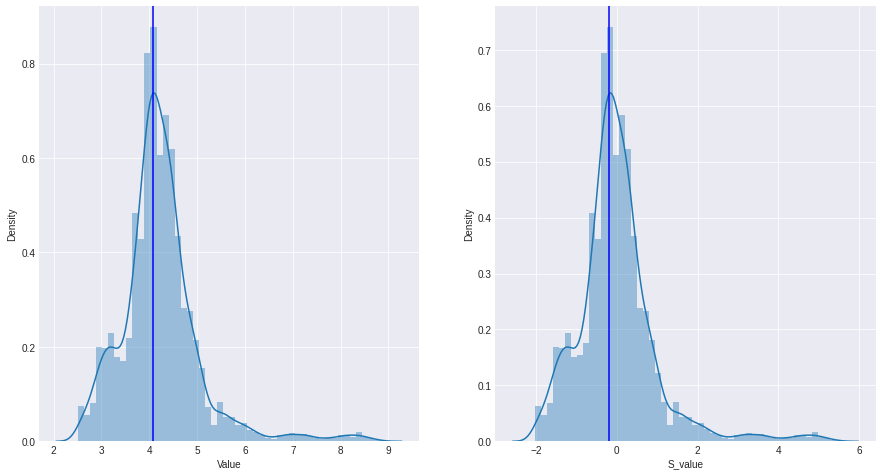

In [14]:
scale_plot(df_b)

The Valuation of The stock is: 4.07  and the scaled value is:  -0.177


The normalised distribution of the Values
The normalised distribution of the Scaled Values


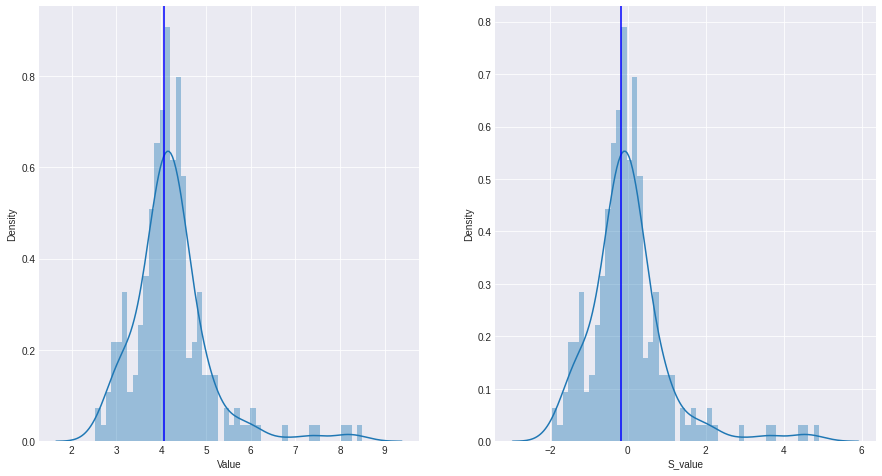

In [15]:
scale_plot(df_m)

### As per custom month
Custom Selection for deriving Valuation equivalence at a certain point.

- Pass a snippet of the main series as arguement. (Starting from the beginning and ending at a dersired month/date)
- pass scale to determine if the past 7 years data can be figured out or not
- Save the output as a seperate dataframe. and join it with the original df with timestamp as reference.
 

In [16]:
# # Create a function for transformation
# def scale_d(series, monthly=False):
#   """ Returns a Standardised series based on the Standard scale
#   Monthly - Whether to perform on monthly data or daily data
#   """

#   if monthly:
#     if len(a)>84:
#       print('No of months available is {}. Hence, the dynamic valuation can be applied'.format(len(a)))
#       sc.fit_transform(a[-84:])
#       scaled_values = sc.transform(a)
#     else:
#       print('No of months available is {}. The dynamic valuation can not be applied'.format(len(a)))

#     series_fit = sc.fit_transform(series)[-84:] # no of months in 7 years
#     scaled_values = sc.transform(series)
 
#   else:
#     if len(a)>1750:
#         print('No of days available is {}. Hence, the dynamic valuation can be applied'.format(len(a)))
#         sc.fit_transform(a[-84:])
#         scaled_values = sc.transform(a)
#     else:
#       print('No of days available is {}. The dynamic valuation can not be applied'.format(len(a)))

#     series_fit = sc.fit_transform(series)[-1750:] # no of days in 7 years
#     scaled_values = sc.transform(series)
  
#   return scaled_values

In [17]:
# # Create if un for determining if the data is more than past 7 years

# def dynamic_scale(a):
#   if len(a)>84:
#     print('No of months available is {}. Hence, the dynamic valuation can be applied'.format(len(a)))
#     sc.fit_transform(a[-84:])
#     scaled_values = sc.transform(a)
#   else:
#     print('No of months available is {}. The dynamic valuation can not be applied'.format(len(a)))
#   return scaled_values



Although I am creating these functions for manual operation, we will have to consider automating the same in the future.

In [18]:
# Pass the end date for reference (format yyyy-mm)
V_2018 = scale(df_m[['Value']][:'2018-12'], monthly=True).round(3)
V_2018 = pd.DataFrame(V_2018, index = df_m[['Value']][:'2018-12'].index , columns= ['Scaled_2018'])
V_2018.tail()


No of months available is 201. Hence, the scale function can be applied.


,Scaled_2018
Date,
2018-08-31,0.240
2018-09-30,0.107
2018-10-31,-0.775
2018-11-30,-0.356
2018-12-31,-0.257


In [19]:
V_2019 = scale(df_m[['Value']][:'2019-12'], monthly=True).round(3)
V_2019 = pd.DataFrame(V_2019, index = df_m[['Value']][:'2019-12'].index , columns= ['Scaled_2019'])
V_2019.tail()

No of months available is 213. Hence, the scale function can be applied.


,Scaled_2019
Date,
2019-08-31,-0.397
2019-09-30,0.045
2019-10-31,0.057
2019-11-30,0.238
2019-12-31,-0.011


In [20]:
V_2020 = scale(df_m[['Value']][:'2020-12'], monthly=True).round(3)
V_2020 = pd.DataFrame(V_2020, index = df_m[['Value']][:'2020-12'].index , columns= ['Scaled_2020'])
V_2020.tail()

No of months available is 225. Hence, the scale function can be applied.


,Scaled_2020
Date,
2020-08-31,-0.883
2020-09-30,-1.178
2020-10-31,-0.827
2020-11-30,0.035
2020-12-31,-0.192


In [21]:
V_2014 = scale(df_m[['Value']][:'2014-12'], monthly=True).round(3)
V_2014 = pd.DataFrame(V_2014, index = df_m[['Value']][:'2014-12'].index , columns= ['Scaled_2014'])
V_2014.tail()

No of months available is 153. Hence, the scale function can be applied.


,Scaled_2014
Date,
2014-08-31,0.166
2014-09-30,0.067
2014-10-31,0.266
2014-11-30,0.496
2014-12-31,0.196


In [22]:
V_2010 = scale(df_m[['Value']][:'2010-12'], monthly=True).round(3)
V_2010 = pd.DataFrame(V_2010, index = df_m[['Value']][:'2010-12'].index , columns= ['Scaled_2010'])
V_2010.tail()

No of months available is 105. Hence, the scale function can be applied.


,Scaled_2010
Date,
2010-08-31,0.095
2010-09-30,0.458
2010-10-31,0.129
2010-11-30,0.154
2010-12-31,0.053


In [23]:
V_2017 = scale(df_m[['Value']][:'2017-12'], monthly=True).round(3)
V_2017 = pd.DataFrame(V_2017, index = df_m[['Value']][:'2017-12'].index , columns= ['Scaled_2017'])
V_2017.tail()

No of months available is 189. Hence, the scale function can be applied.


,Scaled_2017
Date,
2017-08-31,0.658
2017-09-30,0.745
2017-10-31,0.680
2017-11-30,0.810
2017-12-31,0.875


In [24]:
df_M_combined = df_m.join(V_2010, how= 'outer').join(V_2014, how= 'outer').join(V_2017, how= 'outer').join(V_2018, how= 'outer').join(V_2019, how= 'outer').join(V_2020, how= 'outer')

In [25]:
df_M_combined.tail(50)

,Value,Mcap,S_value,Scaled_2010,Scaled_2014,Scaled_2017,Scaled_2018,Scaled_2019,Scaled_2020
Date,,,,,,,,,
2017-05-31,4.69,419577.94,0.534,NaN,NaN,0.474,0.460,0.476,0.523
2017-06-30,4.51,425269.87,0.328,NaN,NaN,0.279,0.262,0.272,0.319
2017-07-31,4.87,459238.11,0.741,NaN,NaN,0.669,0.659,0.680,0.727
2017-08-31,4.86,458197.24,0.730,NaN,NaN,0.658,0.648,0.669,0.715
2017-09-30,4.94,465907.51,0.821,NaN,NaN,0.745,0.736,0.759,0.806
2017-10-31,4.88,467765.27,0.753,NaN,NaN,0.680,0.670,0.691,0.738
2017-11-30,5.00,479322.41,0.890,NaN,NaN,0.810,0.802,0.827,0.874
2017-12-31,5.06,485272.61,0.959,NaN,NaN,0.875,0.868,0.895,0.942
2018-01-31,5.15,520059.00,1.062,NaN,NaN,NaN,0.968,0.998,1.044


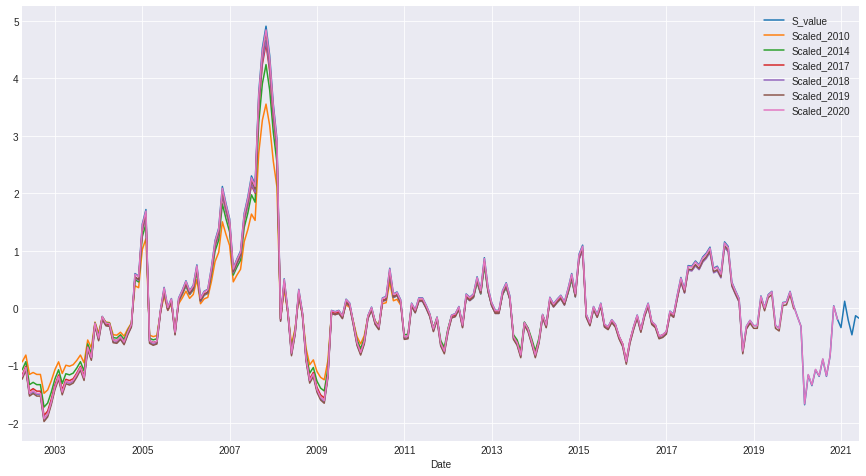

In [26]:
plt.figure(figsize=(15,8))
df_M_combined['S_value'].plot()
df_M_combined['Scaled_2010'].plot()
df_M_combined['Scaled_2014'].plot()
df_M_combined['Scaled_2017'].plot()
df_M_combined['Scaled_2018'].plot()
df_M_combined['Scaled_2019'].plot()
df_M_combined['Scaled_2020'].plot()

plt.legend()
plt.show()
